# EQUITY CLIQUET OPTION

Valuation and Risk of Equity Cliquet Options

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.market.curves import *
from financepy.products.equity import *

####################################################################
# FINANCEPY BETA Version 0.180 - This build:  22 Sep 2020 at 22:40 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#    For bug reports and comments - allmypythonprojects@gmail.com  #
####################################################################



# Cliquet Option

I create a cliquet option

In [3]:
startDate = FinDate(1,1, 2020)

In [4]:
expiryDate = FinDate(1, 1, 2025)

In [5]:
optionTypeCall = FinOptionTypes.EUROPEAN_CALL

In [6]:
frequencyType = FinFrequencyTypes.ANNUAL

In [7]:
cliquetCall = FinEquityCliquetOption(startDate, expiryDate, optionTypeCall, frequencyType)

In [8]:
print(cliquetCall)

OBJECT TYPE: FinEquityCliquetOption
START DATE: WED 01 JAN 2020
FINAL EXPIRY DATE: WED 01 JAN 2025
OPTION TYPE: FinOptionTypes.EUROPEAN_CALL
FREQUENCY TYPE: FinFrequencyTypes.ANNUAL
DAY COUNT TYPE: FinDayCountTypes.THIRTY_E_360
CALENDAR TYPE: FinCalendarTypes.WEEKEND
BUS DAY ADJUST TYPE: FinBusDayAdjustTypes.FOLLOWING
DATE GEN RULE TYPE: FinDateGenRuleTypes.BACKWARD


## Valuation

In [9]:
valueDate = FinDate(1, 1, 2020)

In [10]:
interestRate = 0.10

In [11]:
discountCurve = FinDiscountCurveFlat(valueDate, interestRate)

In [12]:
dividendYield = 0.0

In [13]:
volatility = 0.10

In [14]:
model = FinEquityModelBlackScholes(volatility)

In [15]:
stockPrices = np.linspace(50, 150, 20)

In [16]:
values = []

for stockPrice in stockPrices:
    stockMinMax = stockPrice
    v = cliquetCall.value(valueDate, stockPrice, discountCurve, dividendYield, model)
    values.append(v)

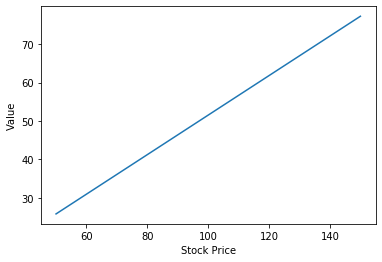

In [17]:
plt.plot(stockPrices, values)
plt.xlabel("Stock Price")
plt.ylabel("Value");

In [18]:
cliquetCall.printFlows()

FRI 01 JAN 2021 0.9048374180359595 15.466949983047213
MON 03 JAN 2022 0.818282256374285 15.517867980773193
MON 02 JAN 2023 0.7406152845863752 15.416447833853757
MON 01 JAN 2024 0.6703200460356393 15.418995331331525
WED 01 JAN 2025 0.6065306597126334 15.485419349561152


Copyright (c) 2020 Dominic O'Kane